In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [2]:
# import Wisconsin Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
# store dataset in variable "cancer"
cancer = load_breast_cancer()
# display the keys to see they match those of the iris dataset
# the keys follow the standard scikit-learn dataset structure
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# observe the size of the dataset: 569 examples, 30 features each
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [4]:
# classification task with categories 'maligant' and 'benign'
# look at how many of the training examples have each label
print("Sample counts per class:\n",
     {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})
# cancer.target_names are the names of the labels
# np.bincount(cancer.target) counts how many occurences there are of each label
# zip pairs up the values in these two lists
# for n,v in zip(....) takes these pairs out one by one and assigns the first
# element in the pair to n and the second element in the pair to v
# {n: v for n,v in zip(...)} prints out each of the n,v pairs inside a set of braces

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [5]:
# observe the set of features available for learning
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
# construct training and test sets from cancer dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [11]:
# set up some variables to store information about our accuracy as we try running
# k-Nearest-Neighbors with a few different values of k
training_accuracy = []    # will store accuracy values on training data for each k value
test_accuracy = []        # will store accuracy values on test data for each k value
neighbors_settings = range(1,40)    # k values to test algorithm with

In [12]:
X_train

array([[1.387e+01, 2.070e+01, 8.977e+01, ..., 6.845e-02, 2.249e-01,
        8.492e-02],
       [1.757e+01, 1.505e+01, 1.150e+02, ..., 1.456e-01, 2.756e-01,
        7.919e-02],
       [1.330e+01, 2.157e+01, 8.524e+01, ..., 5.614e-02, 2.637e-01,
        6.658e-02],
       ...,
       [1.458e+01, 2.153e+01, 9.741e+01, ..., 2.701e-01, 4.264e-01,
        1.275e-01],
       [1.365e+01, 1.316e+01, 8.788e+01, ..., 8.056e-02, 2.380e-01,
        8.718e-02],
       [2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
        8.218e-02]])

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# the variable n_neighbors will be assigned each value from neighbors_settings in turn
for k_value in neighbors_settings:
    print("Running kNN with k = ", k_value)
    # build a kNN model with this value of k
    clf = KNeighborsClassifier(n_neighbors=k_value)
    # fit the model to the training data
    clf.fit(X_train, y_train)
    # record the training set accuracy for this model
    training_accuracy.append(clf.score(X_train, y_train))
    # record the test set accuracy for this model
    test_accuracy.append(clf.score(X_test, y_test))

Running kNN with k =  1
Running kNN with k =  2
Running kNN with k =  3
Running kNN with k =  4
Running kNN with k =  5
Running kNN with k =  6
Running kNN with k =  7
Running kNN with k =  8
Running kNN with k =  9
Running kNN with k =  10
Running kNN with k =  11
Running kNN with k =  12
Running kNN with k =  13
Running kNN with k =  14
Running kNN with k =  15
Running kNN with k =  16
Running kNN with k =  17
Running kNN with k =  18
Running kNN with k =  19
Running kNN with k =  20
Running kNN with k =  21
Running kNN with k =  22
Running kNN with k =  23
Running kNN with k =  24
Running kNN with k =  25
Running kNN with k =  26
Running kNN with k =  27
Running kNN with k =  28
Running kNN with k =  29
Running kNN with k =  30
Running kNN with k =  31
Running kNN with k =  32
Running kNN with k =  33
Running kNN with k =  34
Running kNN with k =  35
Running kNN with k =  36
Running kNN with k =  37
Running kNN with k =  38
Running kNN with k =  39


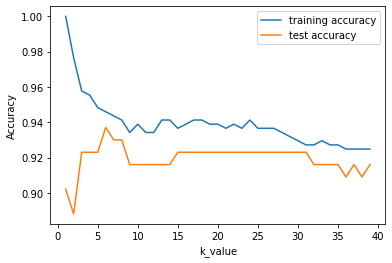

In [14]:
# plot the training and test accuracies
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k_value")
plt.legend()

#### QUESTION: Why does kNN perform perfectly against its training set when k=1 and then start to perform worse against its training set when k increases?

If k=1, the variable will simply be assigned with the value of the single nearest neighbor. The classifier with k=1 will come out with no errors because there is a single closest neighbor to the variable, so the classifier with k=1 will remember the correct label. Though, k=1 does not guarantee the stability of the prediction because it potentially ignores other possible nearest neighbors surrounding for k > 1.

#### QUESTION: If our system "learned" by just guessing the most frequent label, in this case always guessing the tumor is benign, how accurate would that classifier be?

(The accuracy of this classifier may depend on the ratio between the benign tumor and the malignant tumor. There is a possibility of discrimination towards the more frequent patter causing overfitting of the more frequent label.)

kNN performs perfectly against its training set when k = 1 because the training data used to develop the model is the data used for the test. So, when testing kNN on k = 1, the closest neighbor selected is always accurate. 
The accuracy is worse as k increases because more neighbors are evaluated, impacting the assignment accuracy.

In [12]:
from sklearn.metrics import confusion_matrix
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[48  5]
 [ 4 86]]


In [55]:
# TODO: Let k range through larger values, at least 20 and higher if
# you can do so with reasonable runtime. Continue to plot the training
# versus test accuracy. What do you observe about the effect of
# letting k get larger?

# With sligh changes, both the training accuracy as well as the testing accuracy seem to diminish over larger k values.

In [54]:
neighbors_settings = range(1,40)
for k in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    actual = clf.score(X_train, y_train)
    predicted = clf.score(X_test, y_test)
    print("k = ", k, "\n R^2 predicted = ", predicted, " R^2 actual = ", actual)
    y_pred = clf.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    print(format(confusion))

k =  1 
 R^2 predicted =  0.9020979020979021  R^2 actual =  1.0
[[47  6]
 [ 8 82]]
k =  2 
 R^2 predicted =  0.8881118881118881  R^2 actual =  0.9765258215962441
[[48  5]
 [11 79]]
k =  3 
 R^2 predicted =  0.9230769230769231  R^2 actual =  0.9577464788732394
[[47  6]
 [ 5 85]]
k =  4 
 R^2 predicted =  0.9230769230769231  R^2 actual =  0.9553990610328639
[[48  5]
 [ 6 84]]
k =  5 
 R^2 predicted =  0.9230769230769231  R^2 actual =  0.9483568075117371
[[46  7]
 [ 4 86]]
k =  6 
 R^2 predicted =  0.9370629370629371  R^2 actual =  0.9460093896713615
[[48  5]
 [ 4 86]]
k =  7 
 R^2 predicted =  0.9300699300699301  R^2 actual =  0.9436619718309859
[[47  6]
 [ 4 86]]
k =  8 
 R^2 predicted =  0.9300699300699301  R^2 actual =  0.9413145539906104
[[47  6]
 [ 4 86]]
k =  9 
 R^2 predicted =  0.916083916083916  R^2 actual =  0.9342723004694836
[[45  8]
 [ 4 86]]
k =  10 
 R^2 predicted =  0.916083916083916  R^2 actual =  0.9389671361502347
[[45  8]
 [ 4 86]]
k =  11 
 R^2 predicted =  0.9160839

In [56]:
# TODO: Pick the value of k that is at least 20 for which kNN seems to
# perform the best. Get the confusion matrix for a kNN classifier trained
# with that value of k. How does it differ from the confusion matrix for
# our kNN classifier trained with k=6?

#Any value of 20 =< k =< 31.
# With 20 =< k =< 31, the error in which true values are predicted to be false are larger 
# compared to k = 6. Larger k than 6 potentially lowers the accuracy of the prediction of the classifier. 